In [126]:
import math
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
#initial
target_x = 0
target_y = 3
target_v = 0.4
agent_x = 0
agent_y = 0
agent_v = 0.6             

In [3]:
def to_radian(angle):
    return angle/180.*math.pi
def rand_angle(base,alph):
    return base+(random.random()-0.5)*alph*2
class Target(object):
    def __init__(self,ix,iy,v):
        self.x = ix
        self.y = iy
        self.v = v
        self.gt = 0
        self.alph = 0
        self.dalph = 45
    def move_delt(self,delt,isrand=True):
        if isrand:
            self.alph = rand_angle(self.alph,self.dalph)%360
            self.x = self.x+delt*self.v*math.cos(to_radian(self.alph))
            self.y = self.y+delt*self.v*math.sin(to_radian(self.alph))
        else:
            self.alph = (self.alph+self.dalph)%360
            self.x = self.x+delt*self.v*math.cos(to_radian(self.alph))
            self.y = self.y+delt*self.v*math.sin(to_radian(self.alph))
        self.gt = self.gt+1

In [38]:
class Tracker(object):
    def __init__(self,ix,iy,v):
        self.x = ix
        self.y = iy
        self.v = v
        self.gt = 0
        self.alph = 0
    def move_delt(self,delt):
        self.x = self.x+delt*self.v*math.cos(to_radian(self.alph))
        self.y = self.y+delt*self.v*math.sin(to_radian(self.alph))
        self.gt = self.gt+1
    def set_v(self,v):
        self.v = v
    def set_alph(self,alph):
        self.alph = alph

In [93]:
class Algorithm(object):
    def __init__(self,p1,p2):
        self.agent = p1
        self.target = p2
        self.distances = []
    def set_new_point(self,p1,p2):
        self.agent = p1
        self.target = p2
        self.gt =p1.gt
    def policy(self):
        print(self.agent.gt)
        if self.agent.gt>0:
            print("policy()")
            diff = self.distances[-2]-self.distances[-1]
            if diff <-0.2:
                self.agent.alph = (self.agent.alph+60)%360
            elif diff<-0.1:
                self.agent.alph = (self.agent.alph+30)%360
            elif diff<0:
                self.agent.alph = (self.agent.alph+15)%360 
    def policy_ploy(self):
        
    def distance(self):
        self.distances.append(math.sqrt((self.agent.x-self.target.x)**2+(self.agent.y-self.target.y)**2))

In [120]:
tx = []
ty = []
ax = []
ay = []
t = []
def run(delt=0.1):
    target = Target(0,4,0.5)
    agent = Tracker(0,0,0.8) 
    algo = Algorithm(agent,target)
    for i in range(300):
        tx.append(target.x)
        ty.append(target.y)
        ax.append(agent.x)
        ay.append(agent.y)
        t.append(i/10.)
        algo.distance()
        algo.policy()
        print("the  distance is {}".format(algo.distances[-1]))
        target.move_delt(delt)
        agent.move_delt(delt)
        print("the agent direction is {}".format(algo.agent.alph))
        print("the target direction is {}".format(target.alph))
        

In [121]:
run()

0
the  distance is 4.0
the agent direction is 0
the target direction is 32.22513227919228
1
policy()
the  distance is 4.0268388700300255
the agent direction is 15
the target direction is 69.96962349810786
2
policy()
the  distance is 4.054113433667242
the agent direction is 30
the target direction is 43.679982807017026
3
policy()
the  distance is 4.049582396043767
the agent direction is 30
the target direction is 20.034182099056682
4
policy()
the  distance is 4.027510746875592
the agent direction is 30
the target direction is 352.07106631199235
5
policy()
the  distance is 3.981457731622307
the agent direction is 30
the target direction is 14.289660048314431
6
policy()
the  distance is 3.954791585256385
the agent direction is 30
the target direction is 354.3605019032024
7
policy()
the  distance is 3.9109494404562755
the agent direction is 30
the target direction is 20.20874077144964
8
policy()
the  distance is 3.889546788032253
the agent direction is 30
the target direction is 18.3507622

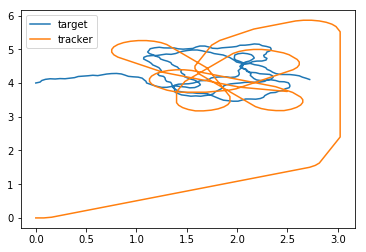

In [122]:
plt.plot(tx,ty,label = 'target')
plt.plot(ax,ay,label = 'tracker')
plt.legend()
plt.show()

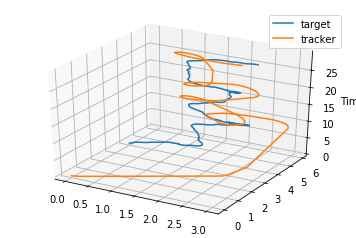

In [130]:
fig = plt.figure()
ax3d = fig.gca(projection='3d')
ax3d.plot(tx,ty,t,label='target')
ax3d.plot(ax,ay,t,label='tracker')
ax3d.set_zlabel("Time")
ax3d.legend()
plt.show()